<a href="https://colab.research.google.com/github/eduardarsimoes/IA_Algoritmos/blob/main/A_pso/src/IA_Apso_CaickeEduarda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TRABALHO 3: Algoritmo PSO** 

---

#### INTELIGÊNCIA ARTIFICIAL 2020/2 EAD - Caicke Pinheiro e Eduarda Simões


## Importando as bibliotecas

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [9]:
import random
import math
import statistics

## Implementação

### Classe partícula e suas funções

In [10]:
class Particula:

  def __init__(self, vel):
    self.pos = [random.randint(-512, 512), random.randint(-512, 512)]
    self.melhor_pos = self.pos
    self.aptidao = math.inf
    self.melhor_aptidao = math.inf
    self.vel = vel


  def calcula_aptidao(self):
    self.aptidao = fitness(self.pos)

    if self.aptidao < self.melhor_aptidao:
      self.melhor_aptidao = self.aptidao
      self.melhor_pos = self.pos


  def atualiza_posicao(self):
    for i in range(0, 2):
      self.pos[i] = self.pos[i]+self.vel[i]

      if self.pos[i] > 512:
        self.pos[i] = 512

      if self.pos[i] < -512:
        self.pos[i] = -512


  def atualiza_velocidade(self, pos_best_g):
    # motivo da escolha: https://www.researchgate.net/publication/309658844_Inertia_weight_control_strategies_for_particle_swarm_optimization_Too_much_momentum_not_enough_analysis
    
    # valores
    w = 0.729844
    c1 = 1  # indicado o cognitivo ser abaixo do social    
    c2 = 2        

    for i in range(0, 2):
      r1 = random.random()
      r2 = random.random()

      v_local = c1*r1*(self.melhor_pos[i]-self.pos[i])
      v_global = c2*r2*(pos_best_g[i]-self.pos[i])
      self.vel[i] = w*self.vel[i]+v_local+v_global

### Main

In [11]:
def fitness(pos):
  aptidao = -(pos[1] + 47) * math.sin(math.sqrt(abs((pos[0]/2)+(pos[1]+47)))) - pos[0]*math.sin(math.sqrt(abs(pos[0] - (pos[1]+47))))
  return aptidao

In [14]:
def show_resultado(resultados):
    k = 1
    q = 0
    print("-----------------------TABELA-----------------------")
    print("EXECUÇÃO |   MELHOR   |    MÉDIA   | DESVIO PADRÃO ")

    cont_iteracoes = 3
    melhor_aptidao = math.inf
    soma_aptidao   = 0
    aptidoes = []
    melhores_aptidoes = []
    medias = []

    for item in resultados:
      aptidoes.append(item[3])
      q+=1
      soma_aptidao += item[3]
      if melhor_aptidao > item[3]:
          melhor_aptidao = item[3]
      if q == 6:
        media = soma_aptidao / 6
        if k == 10:
          print("   {}    |  {:.3f}  |  {:.3f}  |    {:.3f}  ".format(k, melhor_aptidao, media, statistics.stdev(aptidoes)))
        else:
          print("   0{}    |  {:.3f}  |  {:.3f}  |    {:.3f}  ".format(k, melhor_aptidao, media, statistics.stdev(aptidoes)))
        melhores_aptidoes.append(melhor_aptidao)
        medias.append(media)
        q = 0
        k += 1
        soma_aptidao = 0
        melhor_aptidao = math.inf
        aptidoes.clear()
        
    grafico(melhores_aptidoes, medias)

In [17]:
def grafico(aptidoes, medias):

   aptidao = np.array(aptidoes)
   media = np.array(medias)
   plt.plot(aptidao, 'g--', media, 'bs')

   plt.show()

-----------------------TABELA-----------------------
EXECUÇÃO |   MELHOR   |    MÉDIA   | DESVIO PADRÃO 
   01    |  -794.047  |  -770.307  |    26.006  
   02    |  -930.765  |  -891.123  |    43.425  
   03    |  -786.108  |  -696.687  |    97.956  
   04    |  -810.239  |  -726.886  |    91.309  
   05    |  -650.754  |  -624.134  |    29.160  
   06    |  -792.694  |  -689.586  |    112.949  
   07    |  -704.725  |  -686.725  |    19.718  
   08    |  -867.942  |  -767.101  |    110.466  
   09    |  -701.201  |  -675.951  |    27.660  
   10    |  -952.575  |  -879.891  |    79.621  


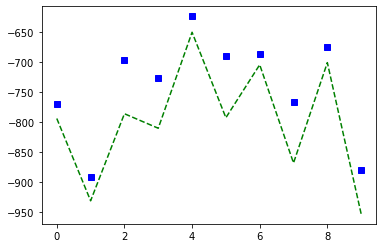

In [18]:
def main():
    # definindo
    iteracoes             = [20, 50, 100]
    n_particulas          = [50, 100]
    execucoes             = 10
    melhor_aptidao_global = math.inf
    melhor_posicao_global = []
    populacao             = []
    resultados            = []

    # velocidade inical aleatorio comum a todas particulas
    velocidadeInicial     = [random.randint(-77, 77), random.randint(-77, 77)]

    contPop = 0 # para 50 e depois 100 particulas para cada populacao
    j = 0 # para cada iteracao

    while execucoes > 0:                                                            # 10 execucoes
        while contPop < 2:                                                          # 2 populacoes (50, 100)
            # criando populacao com velocidade inicial igual e posicao aleatoria para cada particula
            for i in range(0, n_particulas[contPop]):
                populacao.append(Particula(velocidadeInicial))
            iteracao = iteracoes[j]

            while iteracao > 0:                                                     # criterio de parada (20, 50, 100)
                for particula in populacao:
                    particula.calcula_aptidao()

                  # guardando a melhor aptidao global
                    if melhor_aptidao_global > particula.aptidao:
                        melhor_aptidao_global = particula.aptidao
                        melhor_posicao_global = particula.pos

                # atualizando velocidade e posicao local
                for particula in populacao:
                    particula.atualiza_velocidade(melhor_posicao_global)
                    particula.atualiza_posicao()

                iteracao -= 1
                if iteracao == 0:
                    resultados.append([n_particulas[contPop], iteracoes[j], melhor_posicao_global, melhor_aptidao_global])

                    j += 1
                    if j < 3:
                        iteracao = iteracoes[j]
                    else:
                        j = 0
            ### fim iteracoes

            # nova populacao com 100 particulas
            populacao.clear()
            melhor_aptidao_global = math.inf
            melhor_posicao_global = []
            velocidadeInicial = [random.randint(-77, 77), random.randint(-77, 77)]
            contPop += 1
        contPop = 0
        j = 0
        execucoes -= 1

    ### fim execucoes
    show_resultado(resultados)


if __name__ == "__main__":
    main()